Found 400 images belonging to 4 classes.


c:\Users\heman\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


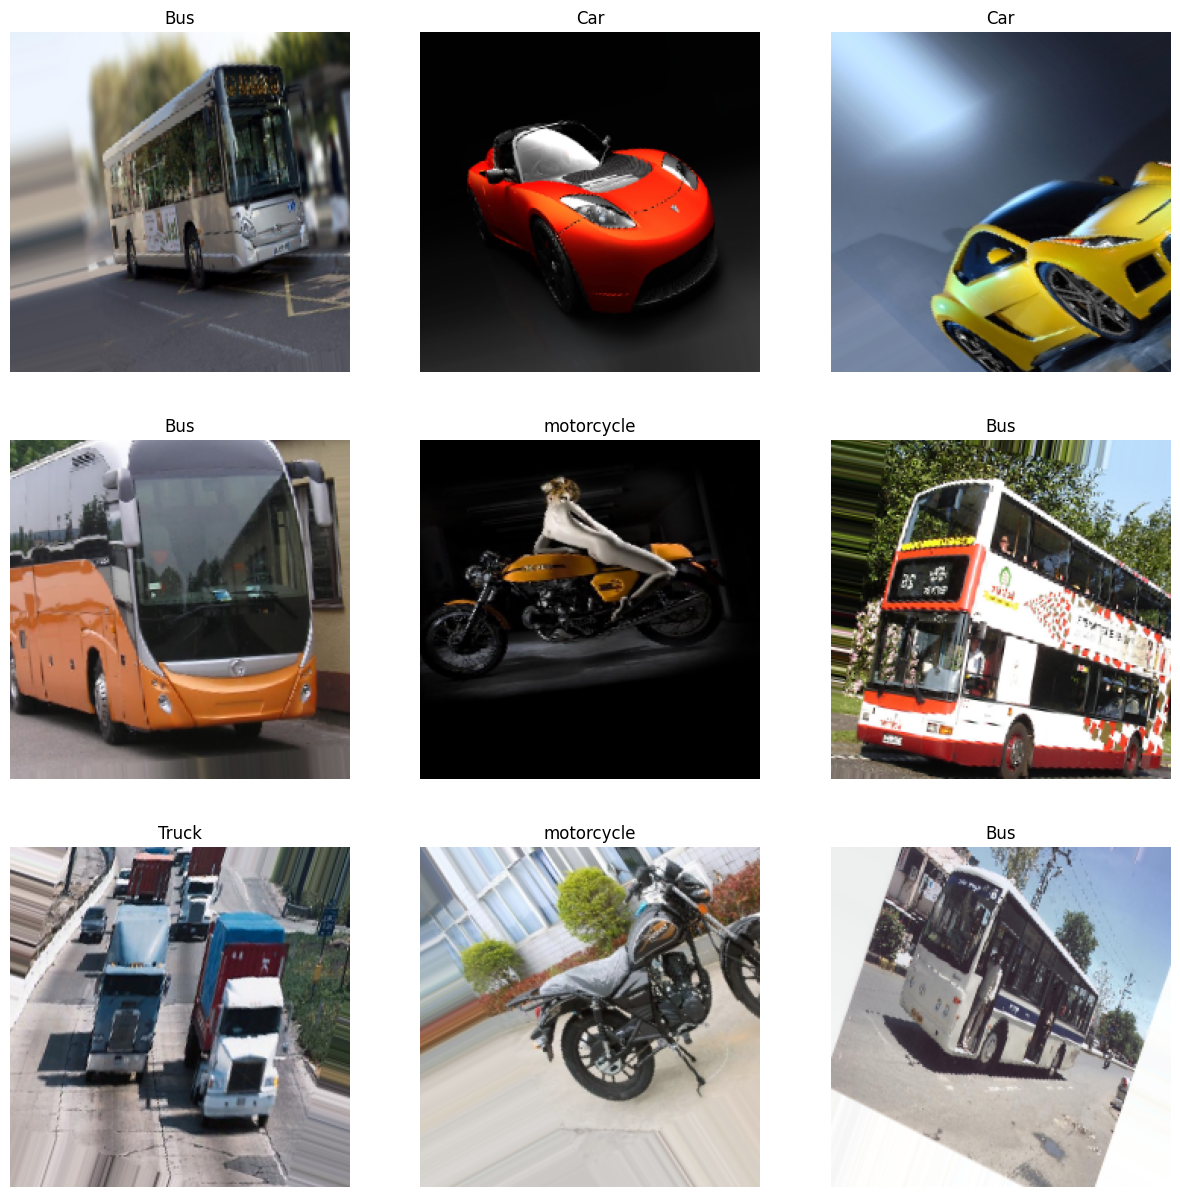

Epoch 1/30


c:\Users\heman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 2/12 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - acc: 0.2969 - loss: 2.2159  

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras import models, layers, optimizers

# Set the path to the dataset folder
dataset_path = 'vehicle-type-recognition/Dataset'

# Set the batch size and image size
batch_size = 32
image_size = (224, 224)

# Create an instance of the ImageDataGenerator class for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create a generator for the training data
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Load the VGG16 model with pre-trained weights
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by adding custom layers on top of the base model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

# Compile the model
# model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['acc']
)

# Get the class labels
class_labels = train_generator.class_indices
class_labels = dict((v, k) for k, v in class_labels.items())

# Display the images and their labels
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i in range(9):
    x, y = next(train_generator)
    image = x[0]
    label = y[0]

    label = np.argmax(label)
    label = class_labels[label]
    ax[i//3, i%3].imshow(image)
    ax[i//3, i%3].set_title(label)
    ax[i//3, i%3].axis('off')
plt.show()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30
)

# Display the training accuracy and loss
acc = history.history['acc']
loss = history.history['loss']
epochs_range = range(len(acc))

plt.figure(figsize=(15, 15))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()

# Display the images and their predicted labels
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i in range(9):
    x, y = next(train_generator)
    image = x[0]
    label = y[0]

    # Get the predicted label
    pred = model.predict(np.expand_dims(image, axis=0))
    pred_label = np.argmax(pred)
    pred_label = class_labels[pred_label]

    ax[i//3, i%3].imshow(image)
    ax[i//3, i%3].set_title(f'Predicted: {pred_label}')
    ax[i//3, i%3].axis('off')
plt.show()
